이디야는 스타벅스 근처에 입점한다는 설이 있습니다. 과연 이디야와 스타벅스의 매장입지는 얼마나 차이가 날까요? 과련 기사를 읽고 구별로 이디야와 스타벅스의 매장을 기사와 유사하게 분석하고 시각화 해보면서 Python, Pandas, Numpy, Seaborn, Matplotlib, folium을 통해 다양한 방법으로 표현해 봅니다.

관련기사
[비즈&빅데이터]스타벅스 '쏠림' vs 이디야 '분산'

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

#구버전의 주피터 노트북에서 그래프가 보이는 설정
%matplotlib inline

<AxesSubplot:title={'center':'한글폰트'}>

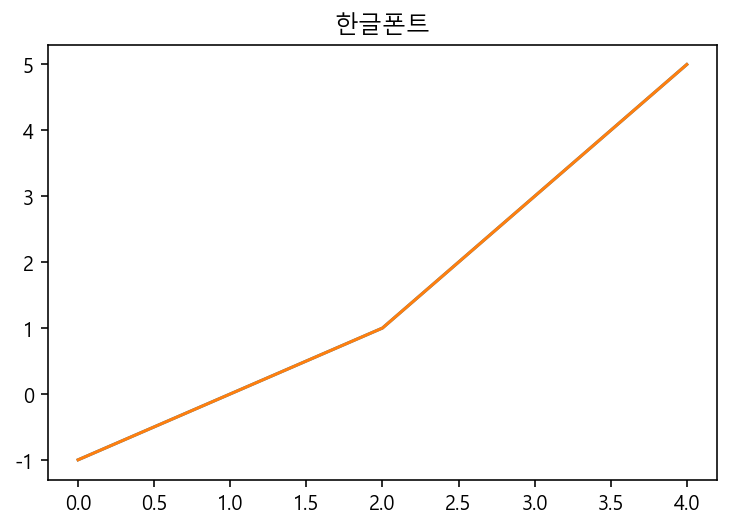

In [2]:
#한글폰트 설정
import matplotlib.pyplot as plt
plt.rc("font", family = "Malgun Gothic " )
plt.rc("axes", unicode_minus=False)

#폰트가 선명하게 보이도록 retina설정
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("retina")

#한글폰트와 마이너스 폰트 설정 확인
pd.Series([-1, 0, 1, 3, 5]).plot(title="한글폰트")

pd.Series([-1,-0,1,3,5]).plot(title="한글폰트")

In [3]:
data = f'상가업소정보_201912_01.csv'
data

'상가업소정보_201912_01.csv'

In [4]:
df = pd.read_csv(data, sep='|')

In [6]:
df.head(1)

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922


In [8]:
df.shape

(573680, 39)

In [9]:
df.info

<bound method DataFrame.info of           상가업소번호            상호명         지점명 상권업종대분류코드  상권업종대분류명 상권업종중분류코드  \
0       19905471         와라와라호프         NaN         Q        음식       Q09   
1       19911397  커피빈코리아선릉로93길점  코리아선릉로93길점         Q        음식       Q12   
2       19911801           프로포즈         NaN         Q        음식       Q09   
3       19912201       싱싱커피&토스트         NaN         Q        음식       Q07   
4       19932756       가락사우나내스낵         NaN         F     생활서비스       F09   
...          ...            ...         ...       ...       ...       ...   
573675  16394290        비파티세리공덕         NaN         Q        음식       Q01   
573676  16336474          앤탑PC방         NaN         N  관광/여가/오락       N01   
573677  16336218       오즈아레나PC방         NaN         N  관광/여가/오락       N01   
573678  16335152         파인트리네일         NaN         F     생활서비스       F01   
573679  16335150         마이리틀네일         NaN         F     생활서비스       F01   

            상권업종중분류명 상권업종소분류코드     상권업종소분류명

<AxesSubplot:>

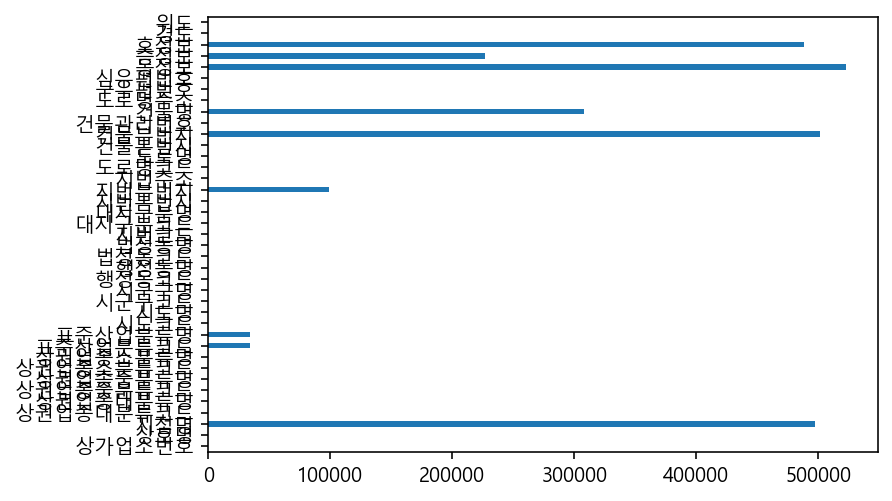

In [14]:
df.isnull().sum().plot.barh()

In [16]:
columns = [ "상호명", "상권업종대분류명","상권업종중분류명","상권업종소분류명","시도명","시군구명","행정동명","법정동명","도로명주소","경도","위도"]
df = df[columns].copy()

In [21]:
df.shape

(573680, 11)

In [23]:
#필요없는 컬럼들 제거후 메모리 사용량 이전이랑 비교해보기
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 11 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   상호명       573679 non-null  object 
 1   상권업종대분류명  573680 non-null  object 
 2   상권업종중분류명  573680 non-null  object 
 3   상권업종소분류명  573680 non-null  object 
 4   시도명       573680 non-null  object 
 5   시군구명      573680 non-null  object 
 6   행정동명      573680 non-null  object 
 7   법정동명      573680 non-null  object 
 8   도로명주소     573680 non-null  object 
 9   경도        573680 non-null  float64
 10  위도        573680 non-null  float64
dtypes: float64(2), object(9)
memory usage: 48.1+ MB


In [24]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(407376, 11)

In [25]:
#상호명을 모두 소문자로 만들어주기
df_seoul["상호명_소문자"] = df_seoul["상호명"].str.lower()

In [26]:
df_seoul["상호명_소문자"]

0                와라와라호프
1         커피빈코리아선릉로93길점
2                  프로포즈
4              가락사우나내스낵
5                   초밥왕
              ...      
573675          비파티세리공덕
573676            앤탑pc방
573677         오즈아레나pc방
573678           파인트리네일
573679           마이리틀네일
Name: 상호명_소문자, Length: 407376, dtype: object

In [33]:
df_seoul[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya")].shape

(543, 12)

In [36]:
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("이디야|이디아|ediya"),"상호명_소문자"]

1675       이디야커피
2957       이디야커피
8534       이디야커피
13913        이디아
14605      이디야커피
           ...  
557161     이디야커피
557163     이디야커피
557498     이디야커피
565196    이디아스포츠
568636     이디야커피
Name: 상호명_소문자, Length: 543, dtype: object

In [42]:
df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks")]

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,상호명_소문자
1104,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,이태원1동,이태원동,서울특별시 용산구 이태원로 188,126.994781,37.534303,스타벅스
2023,스타벅스종로3가점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,종로구,종로1.2.3.4가동,종로3가,서울특별시 종로구 종로 113-1,126.990207,37.570585,스타벅스종로3가점
2770,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서초구,잠원동,잠원동,서울특별시 서초구 강남대로 581,127.019763,37.513663,스타벅스
14770,스타벅스커피여의도IFC1F,음식,커피점/카페,커피전문점/카페/다방,서울특별시,영등포구,여의동,여의도동,서울특별시 영등포구 국제금융로 10,126.924863,37.525172,스타벅스커피여의도ifc1f
14781,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,삼성1동,삼성동,서울특별시 강남구 테헤란로103길 9,127.063878,37.510038,스타벅스
...,...,...,...,...,...,...,...,...,...,...,...,...
563387,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,용산구,한강로동,한강로2가,서울특별시 용산구 한강대로 69,126.965220,37.527452,스타벅스
567090,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,관악구,낙성대동,봉천동,서울특별시 관악구 관악로 158,126.952792,37.479298,스타벅스
567828,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,성동구,금호4가동,금호동4가,서울특별시 성동구 동호로 99,127.015329,37.548028,스타벅스
570096,스타벅스,음식,커피점/카페,커피전문점/카페/다방,서울특별시,서대문구,북아현동,북아현동,서울특별시 서대문구 북아현로 29,126.956144,37.560080,스타벅스


In [41]:
#뒤에 , "상호명_소문자"로 불리언 인덱싱으로 가져오려면 loc를 앞에서 사용해주어야 한다!
df_seoul.loc[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks"),"상호명_소문자"]

1104                스타벅스
2023           스타벅스종로3가점
2770                스타벅스
14770     스타벅스커피여의도ifc1f
14781               스타벅스
               ...      
563387              스타벅스
567090              스타벅스
567828              스타벅스
570096              스타벅스
571052              스타벅스
Name: 상호명_소문자, Length: 506, dtype: object

In [50]:
df_cafe = df_seoul[df_seoul["상호명_소문자"].str.contains("스타벅스|starbucks|이디야|이디아|ediya")].copy()

In [51]:
df_cafe.shape

(1049, 12)

In [86]:
df_cafe.loc[df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'),"브랜드명"]="스타벅스"
df_cafe[["상호명_소문자","브랜드명"]].head(3)

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스


In [87]:
df_cafe.loc[~df_cafe["상호명_소문자"].str.contains('스타벅스|starbucks'),"브랜드명"]="이디야"
df_cafe[["상호명_소문자","브랜드명"]].head(3)

,상호명_소문자,브랜드명
1104,스타벅스,스타벅스
1675,이디야커피,이디야
2023,스타벅스종로3가점,스타벅스


In [92]:
df_cafe[["상호명","브랜드명"]].tail(3)

,상호명,브랜드명
568636,이디야커피,이디야
570096,스타벅스,스타벅스
571052,스타벅스,스타벅스


<AxesSubplot:>

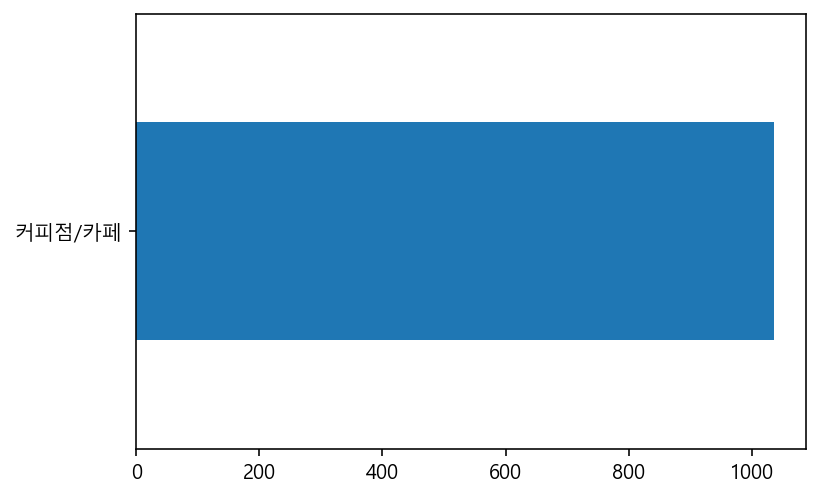

In [83]:
df_cafe["상권업종중분류명"].value_counts().plot.barh()

In [90]:
print(df_cafe.shape)
df_cafe = df_cafe[df_cafe["상권업종중분류명"]=="커피점/카페"].copy()
df_cafe.shape

(1036, 13)


(1036, 13)

In [93]:
df_cafe["브랜드명"].value_counts()

이디야     532
스타벅스    504
Name: 브랜드명, dtype: int64

<AxesSubplot:xlabel='브랜드명', ylabel='count'>

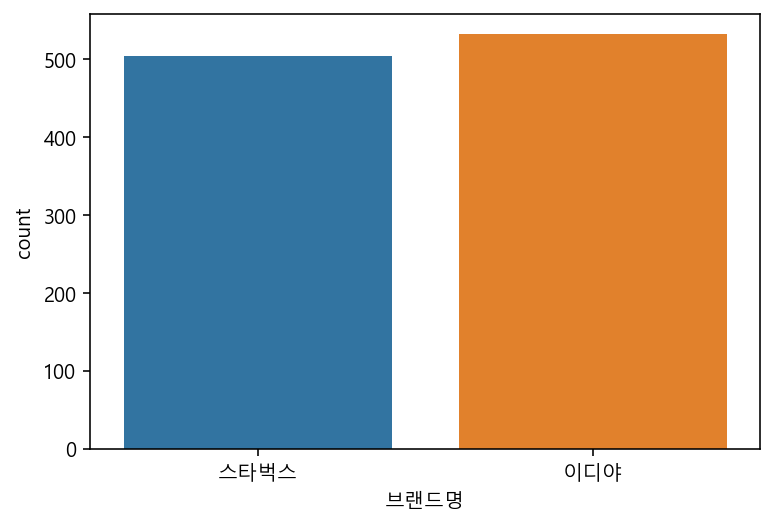

In [94]:
sns.countplot(data=df_cafe, x="브랜드명")

<AxesSubplot:xlabel='시군구명', ylabel='count'>

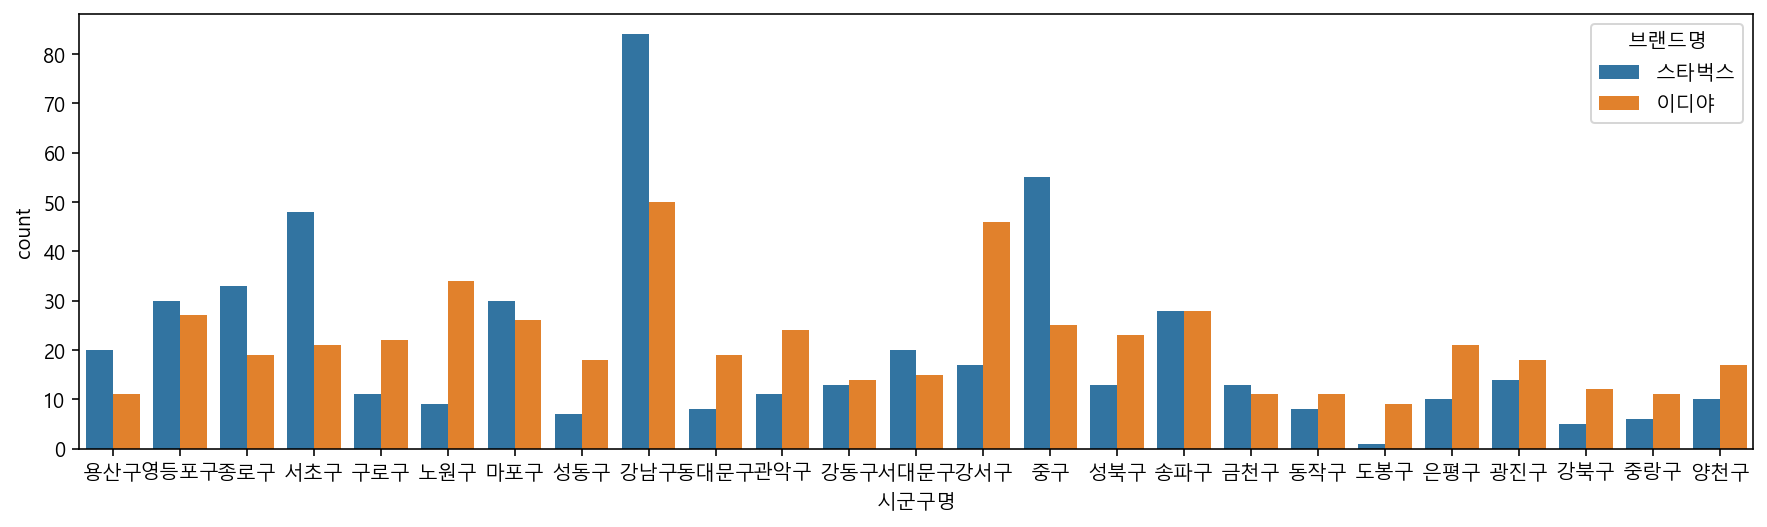

In [96]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x="시군구명",hue="브랜드명")

In [98]:
df_cafe[["위도","경도"]].head(3)

,위도,경도
1104,37.534303,126.994781
1675,37.515118,126.918062
2023,37.570585,126.990207


<AxesSubplot:xlabel='경도', ylabel='위도'>

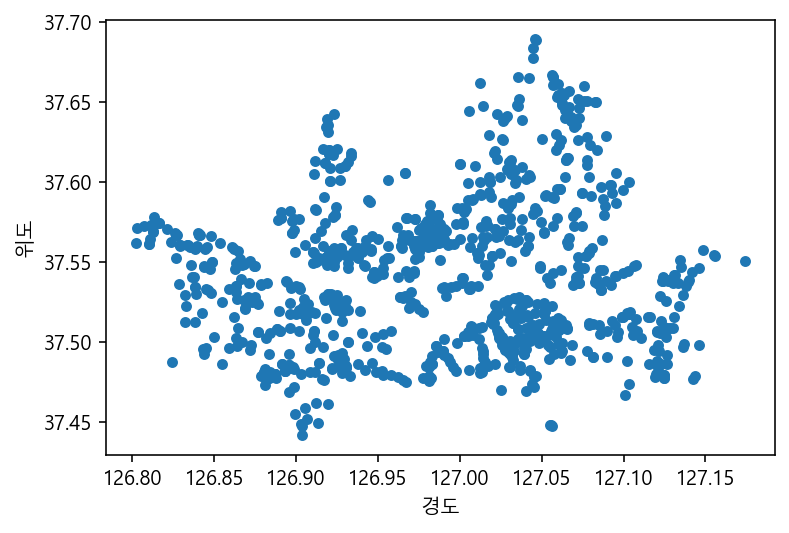

In [99]:
df_cafe[["위도","경도"]].plot.scatter(x="경도", y="위도")

<AxesSubplot:xlabel='경도', ylabel='위도'>

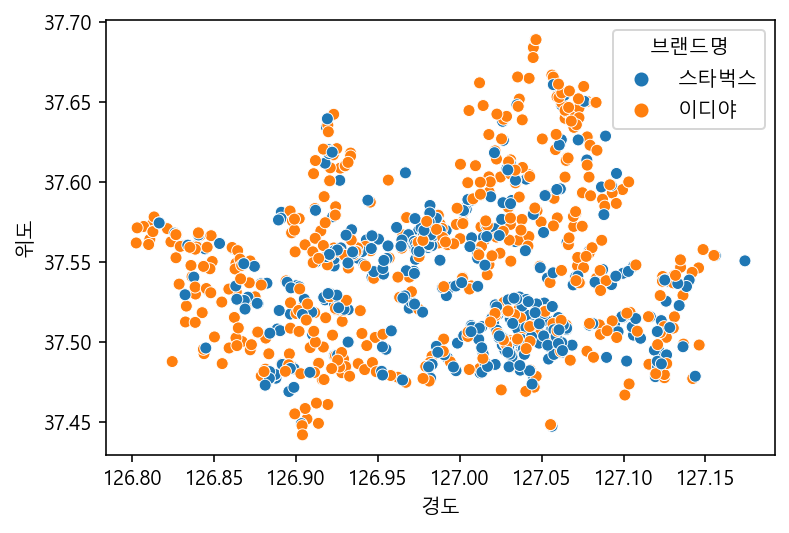

In [100]:
sns.scatterplot(data=df_cafe, x="경도", y="위도", hue = "브랜드명")

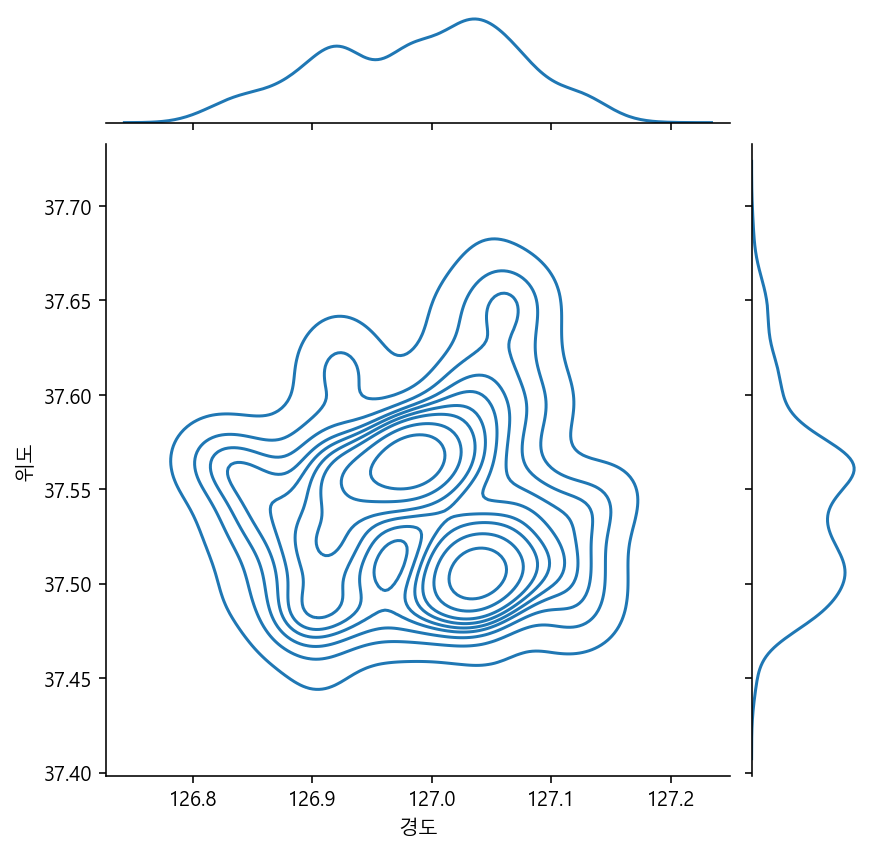

In [127]:
#밀도 추정으로 joinplot으로 그리기
sns.jointplot(data=df_cafe , x="경도", y = "위도", kind="kde")

구별 브랜드별 점포수

-groupby와 pivot_table로 구별 스타벅스, 이디야 매장 수 구하기

groupby로 구별 매장수 구하기

In [128]:
df_cafe_vs = df_cafe.groupby(["시군구명","브랜드명"])["상호명"].count()
df_cafe_vs.head(3)

시군구명  브랜드명
강남구   스타벅스    84
      이디야     50
강동구   스타벅스    13
Name: 상호명, dtype: int64

In [129]:
#데이터프레임으로 만들어주기 >> to_frame 멀티인덱스 데이터프레임으로 만들어주기
#df_cafe_vs.to_frame().head()

In [130]:
#데이터프레임으로 만들어주기 >> reset_index 인덱스로 컬럼으로 만들기.
df_cafe_vs = df_cafe_vs.reset_index() #컬럼명으로 접근
df_cafe_vs.head()

,시군구명,브랜드명,상호명
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [136]:
#컬럼명을 바꿀때 rename을 사용해도 되는데, 아래와 같이 
#df_cafe_vs.columns = ["새로운컬럼이름"] 이렇게
df_cafe_vs.columns = ['구','브랜드명','매장수']
df_cafe_vs.head()

,구,브랜드명,매장수
0,강남구,스타벅스,84
1,강남구,이디야,50
2,강동구,스타벅스,13
3,강동구,이디야,14
4,강북구,스타벅스,5


In [137]:
#pivot_table로 

In [144]:
pivot = pd.pivot_table(data=df_cafe, 
               index=["시군구명","브랜드명"],
               values="상호명",aggfunc="count")
pivot.head(3)

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13

In [145]:
pivot.loc["강남구"]

,상호명
브랜드명,
스타벅스,84
이디야,50



# 둘이 차이점은 groupby는 시리즈 형태로 반환되는데, pivot_table은 데이터브레임으로 반환되어준다.


<AxesSubplot:xlabel='구', ylabel='매장수'>

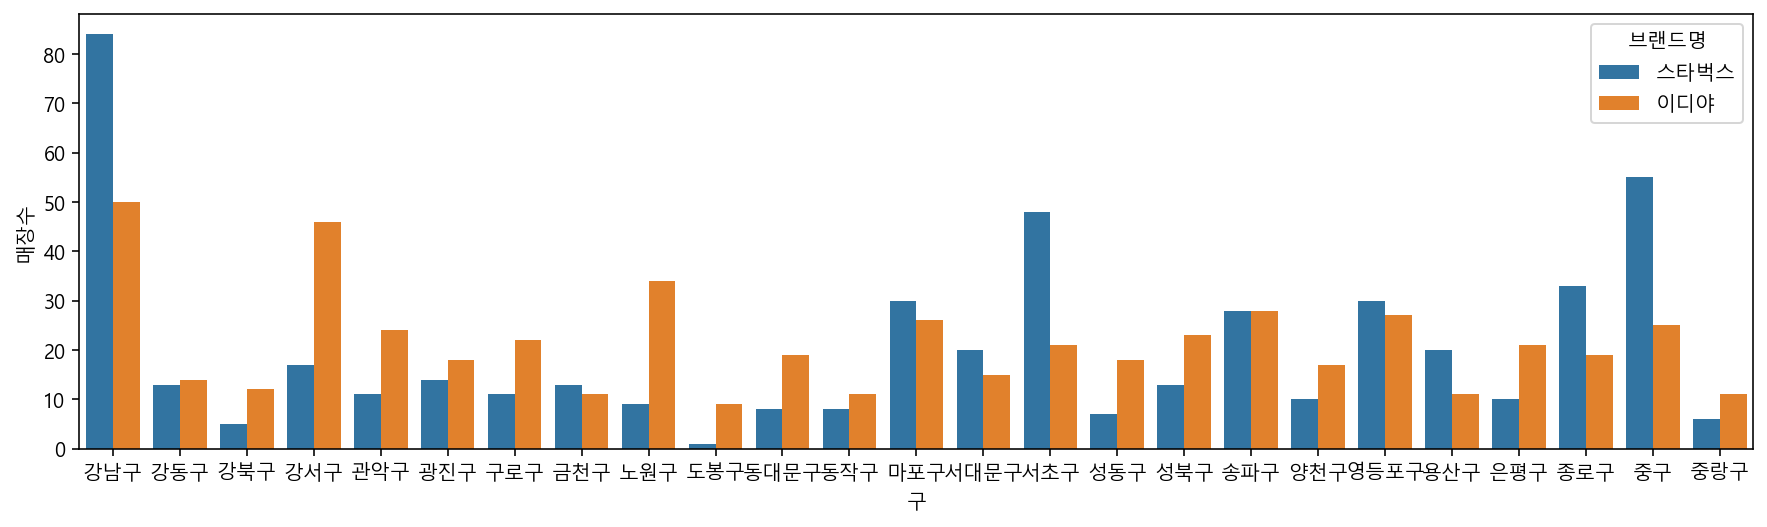

In [147]:
plt.figure(figsize=(15,4))
sns.barplot(data=df_cafe_vs, x="구", y = "매장수", hue="브랜드명")

<AxesSubplot:xlabel='시군구명,브랜드명'>

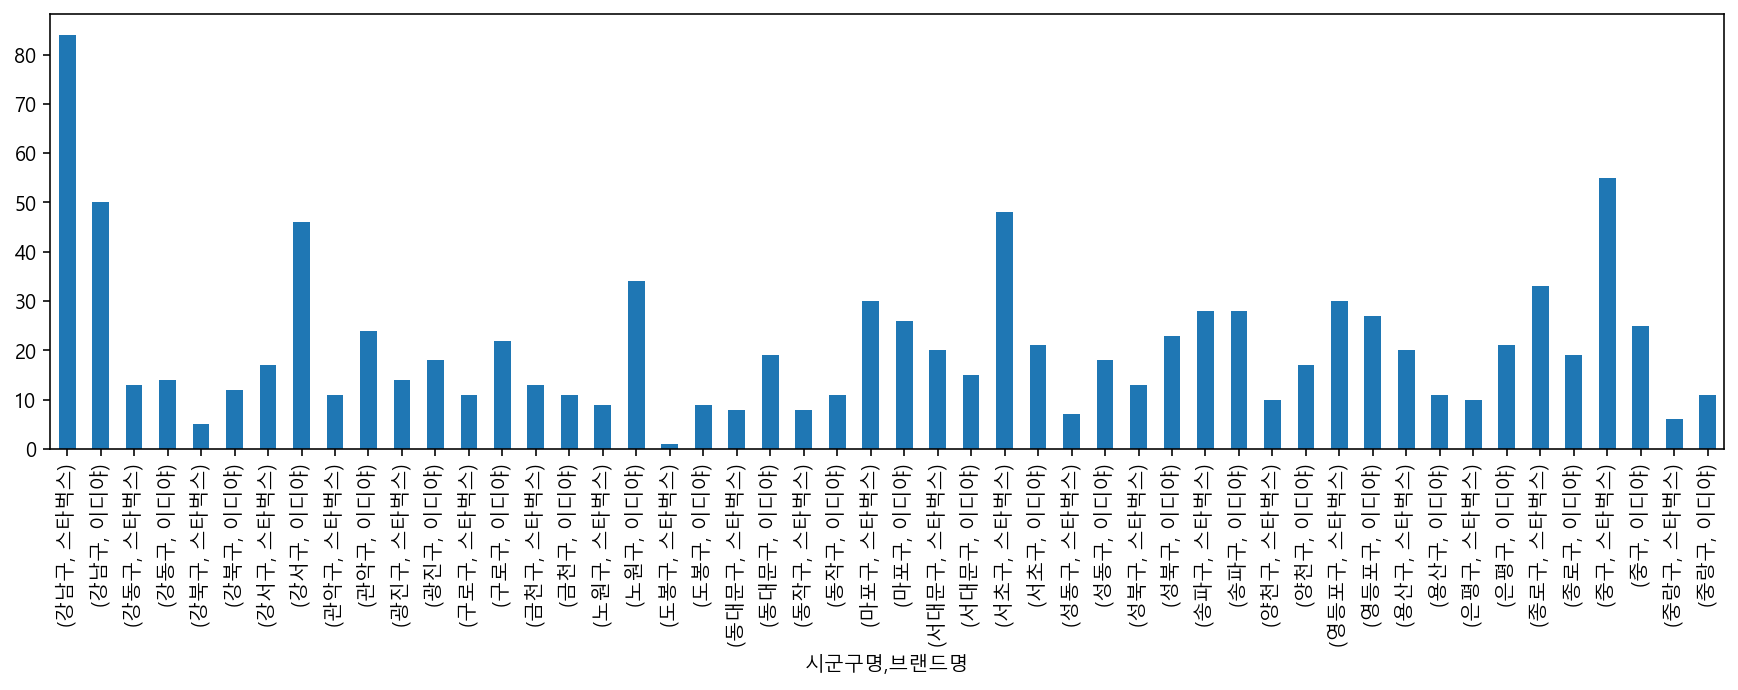

In [153]:
group = df_cafe.groupby(["시군구명","브랜드명"])["상호명"].count()
group.plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명'>

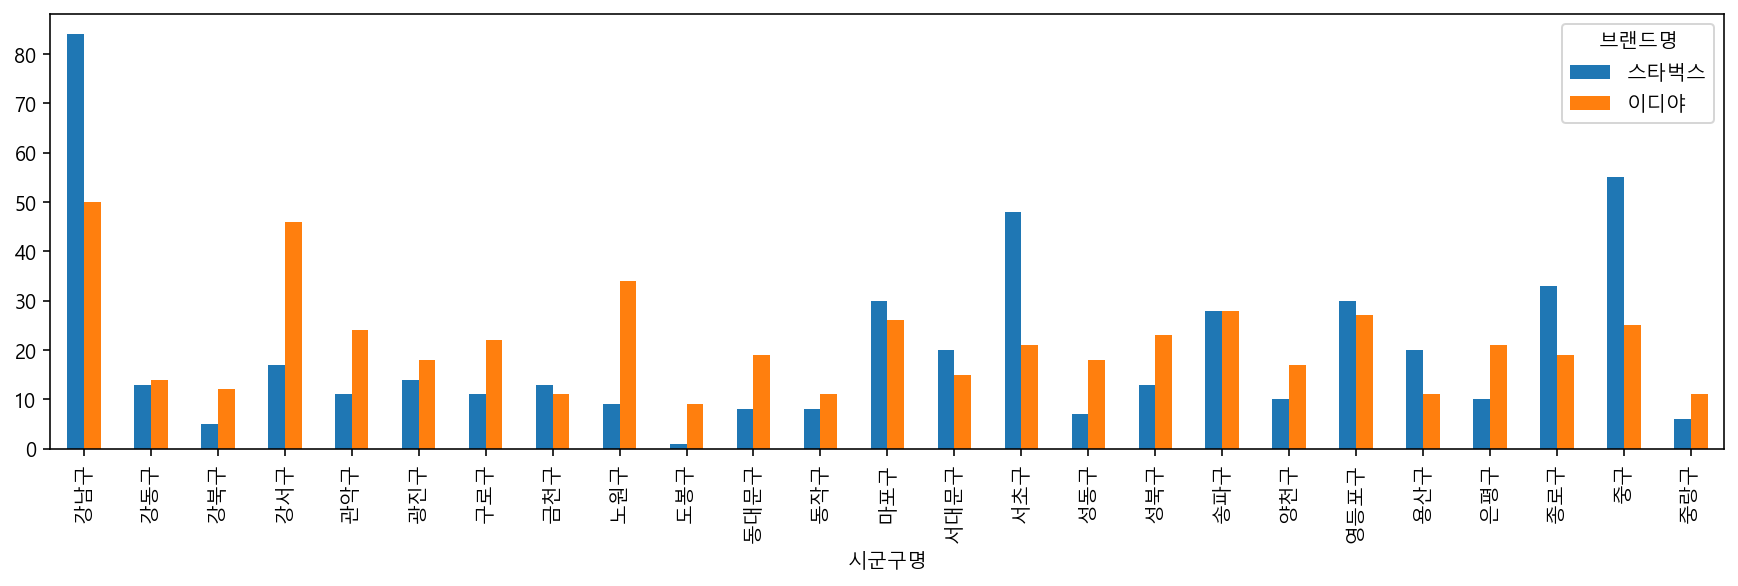

In [157]:
#unstack 사용하기!!!!!, 데이터프레임형태로 만들어주기!!
#컬럼을 다른 색상으로 만들어주기 위해서 
#Pandas >> unstack으로 
group.unstack().plot.bar(figsize=(15,4))

In [160]:
pivot

상호명
시군구명 브랜드명     
강남구  스타벅스   84
     이디야    50
강동구  스타벅스   13
     이디야    14
강북구  스타벅스    5
     이디야    12
강서구  스타벅스   17
     이디야    46
관악구  스타벅스   11
     이디야    24
광진구  스타벅스   14
     이디야    18
구로구  스타벅스   11
     이디야    22
금천구  스타벅스   13
     이디야    11
노원구  스타벅스    9
     이디야    34
도봉구  스타벅스    1
     이디야     9
동대문구 스타벅스    8
     이디야    19
동작구  스타벅스    8
     이디야    11
마포구  스타벅스   30
     이디야    26
서대문구 스타벅스   20
     이디야    15
서초구  스타벅스   48
     이디야    21
성동구  스타벅스    7
     이디야    18
성북구  스타벅스   13
     이디야    23
송파구  스타벅스   28
     이디야    28
양천구  스타벅스   10
     이디야    17
영등포구 스타벅스   30
     이디야    27
용산구  스타벅스   20
     이디야    11
은평구  스타벅스   10
     이디야    21
종로구  스타벅스   33
     이디야    19
중구   스타벅스   55
     이디야    25
중랑구  스타벅스    6
     이디야    11

<AxesSubplot:xlabel='시군구명'>

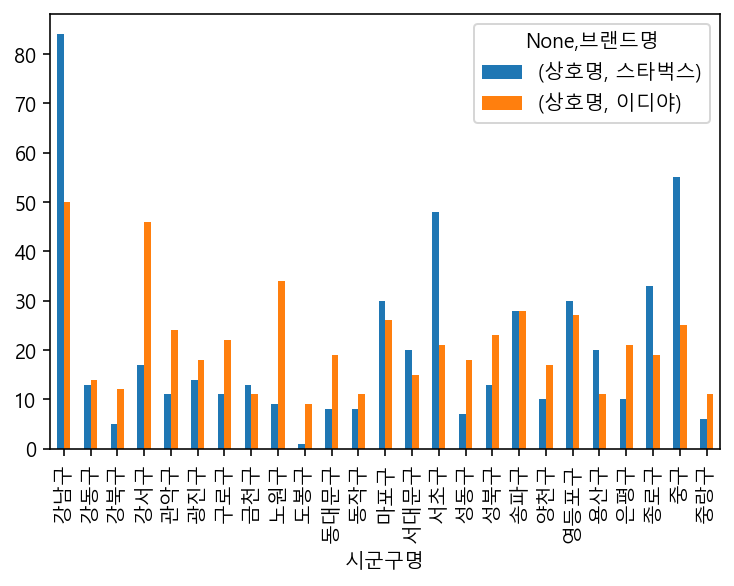

In [163]:
#unstack은 마지막 인덱스의 열이 컬럼으로 온다.
#pivot.unstack().plot.bar()

In [170]:
pivot = pd.pivot_table(data=df_cafe, index= "시군구명",columns="브랜드명", values="상호명", aggfunc="count")

<AxesSubplot:xlabel='시군구명'>

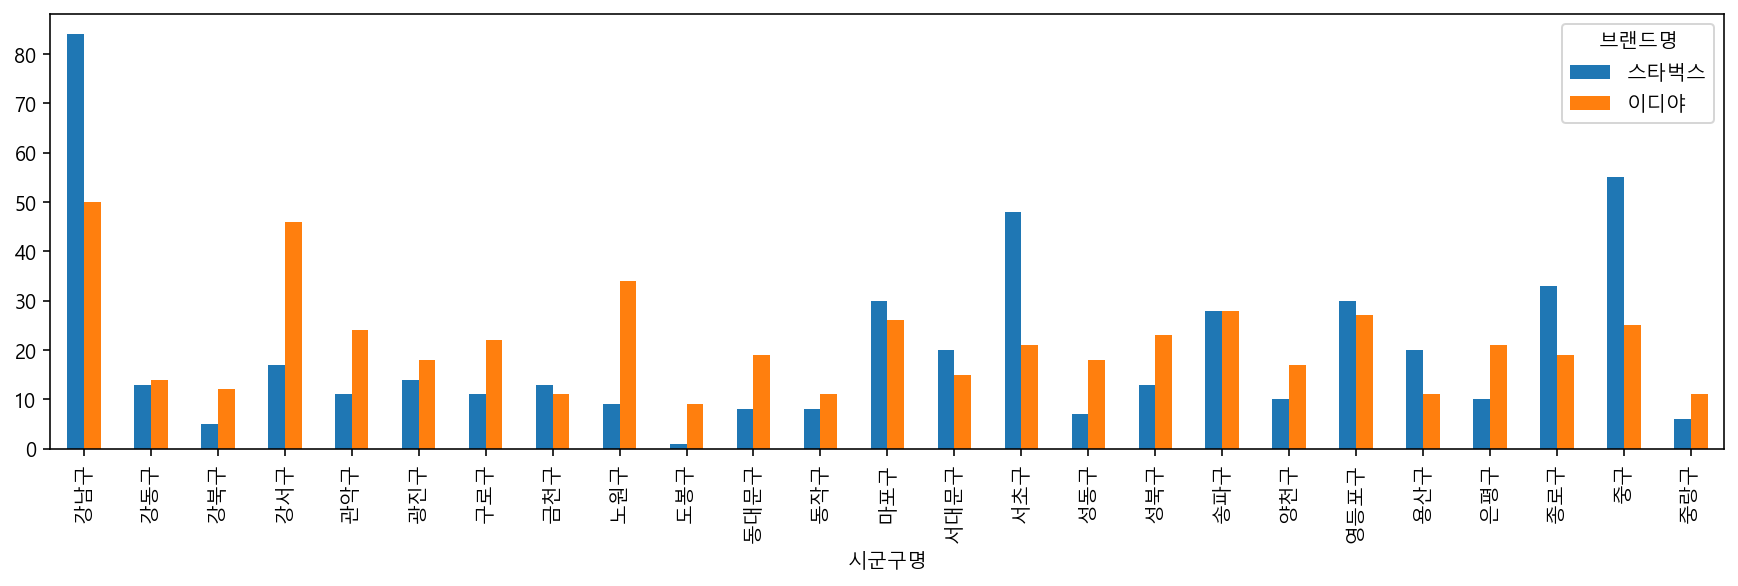

In [172]:
pivot.plot.bar(figsize=(15,4))

<AxesSubplot:xlabel='시군구명', ylabel='count'>

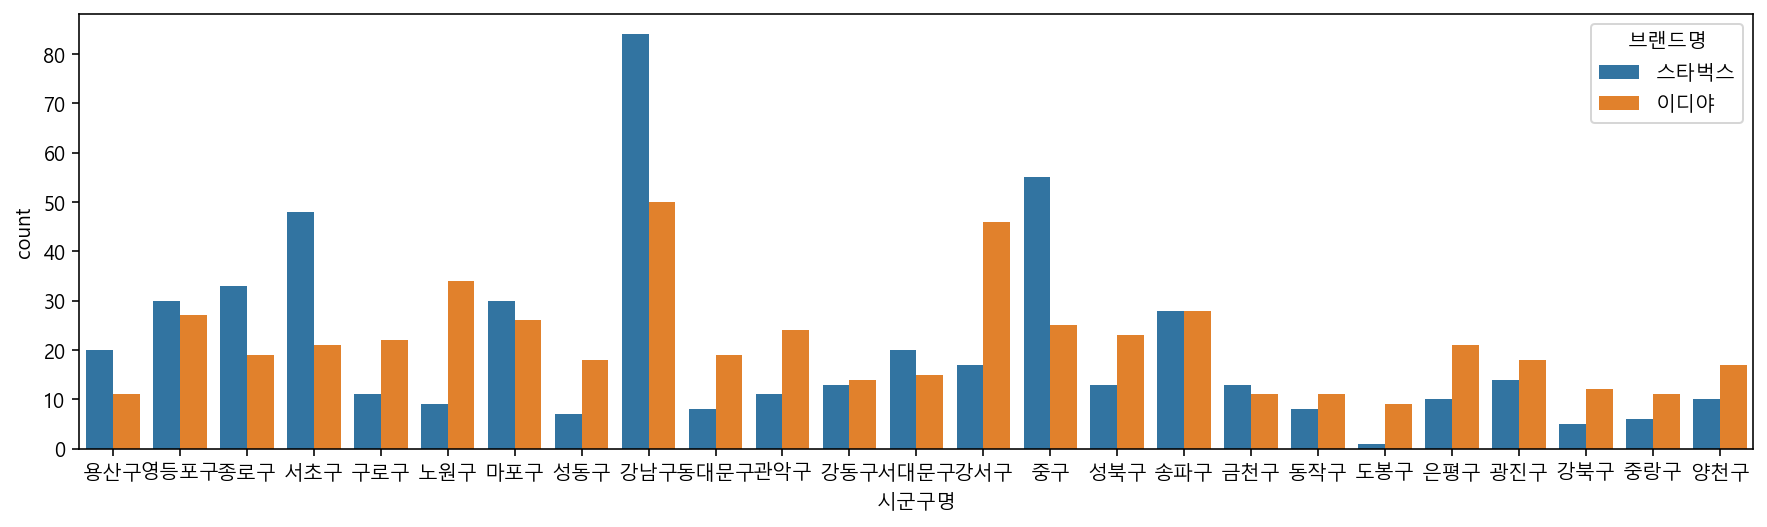

In [174]:
plt.figure(figsize=(15,4))
sns.countplot(data=df_cafe, x="시군구명", hue="브랜드명")

In [175]:
#folium 사용하기!